# Convolutions and linear regression

There are 2 basic ingredients for neural nets

- convolutions
- multivariate linear regression

We'll start by doing convolutions.

- for the theory in french [read this](https://www.f-legrand.fr/scidoc/docmml/image/filtrage/convolution/convolution.html)
- we'll also be doing some image processing from [this tuto](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381)



---

The most common use of a convolution is the 
**moving average** = [moyenne mobile](https://fr.wikipedia.org/wiki/Moyenne_mobile)
which is used to smooth noisy data and we'll start with that.

There are 3 sections:

- moving averages and COVID data
- finding borders in image processing 
- the game of life

There are some exercises after each section.

---

Next week we'll do linear regression






In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
! ../.g


[master 9062073] web
 4 files changed, 5352 insertions(+), 38 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/image_convol-checkpoint.ipynb
 create mode 100644 PROG/image_convol.ipynb
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 118.35 KiB | 6.57 MiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   89708e0..9062073  master -> master


In [5]:
! ../.g

[master 330b58c] web
 2 files changed, 20 insertions(+), 2610 deletions(-)
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 631 bytes | 631.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   9062073..330b58c  master -> master


---

# Following the tuto on convolutions
Read it [here](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381).
We want to detect the borders between blocks of color in an image.

I'm only doing this to let you see what happend in terms of loops.

There are two loops 
- over x 
- over y

You should only usel loops like this when experimenting as it is **expensive**.

There are better implementations of convolutions  in ```scipy```.


In [6]:
import cv2 
import numpy as np

I got an error because cv2 is not in Anaconda so I installed it.

In Linux you can do it like this:

In [175]:
! pip install opencv-python

     |████████████████████████████████| 49.5 MB 128 kB/s eta 0:00:01


In [7]:
def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [8]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    # Cross Correlation
    
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape[0:2]
    xImgShape, yImgShape = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

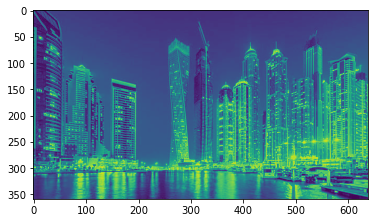

In [93]:
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

kernel = np.ones((3,3))

kernel[1,1] = 0
kernel /= kernel.sum()

image = processImage('./test_image.jpg')

output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output);
plt.imshow(image)

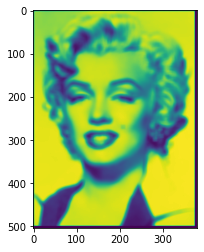

In [92]:
import imageio

im = imageio.imread('./2DConvolved.jpg')
plt.imshow(im);

---

## Let's improve his code 

Change some **dumb** variable names.
- you shouldn't really use [camel case](https://en.wikipedia.org/wiki/Camel_case) 
- use [snake case](https://en.wikipedia.org/wiki/Snake_case) in Python

In [209]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        
        border = int(padding)
        # this is a reference to part of part of the bigger array
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(y_size):
        # Exit Convolution
        if y > y_size - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(x_size):
                # Go to next row once kernel is out of bounds
                if x > x_size - xKernShape:
                    break
                # this is because there might be an error it is very expensive
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        # this is a dot product
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

## Removing redundant ```if```s

So this guy doesn't know that ```range``` was modified to take into account ```strides```
[OMG](https://docs.python.org/2.3/whatsnew/section-slices.html).

In [214]:

def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        
        border = int(padding)
        # this is a reference to part of part of the bigger array
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(0,y_size,strides):
        # Exit Convolution
        if y > y_size - yKernShape: break

        for x in range(0,x_size,strides):
            # Go to next row once kernel is out of bounds
            if x > x_size - xKernShape: break
            # this is because there might be an error it is very expensive
            try:
   
                # this is a dot product
                output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                 break

    return output

## More redundant ```if```s

I can't believe he is putting this on the web

This is probably the best way to see what is going on


In [32]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    x_ker, y_ker = kernel.shape
    x_size, y_size = image.shape[0:2]

    im_padded = np.pad(image, padding,  
                       mode='constant', 
                       constant_values=(0))
    
    # Initialize Output Convolution
    x_out = int(((x_size - x_ker + 2 * padding) / strides) + 1)
    y_out = int(((y_size - y_ker + 2 * padding) / strides) + 1)
    output = np.zeros((x_out, y_out))

    # Iterate through image
    for y in range(0, y_size - y_ker, strides):
        for x in range(0, x_size - x_ker, strides):
            # do the dot product
            output[x, y] = (kernel * im_padded[x: x + x_ker, y: y + y_ker]).sum()

    return output

In [16]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        border = int(padding)
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    #always alias a lookup before a loop
    kk = kernel.ravel().dot
    # Iterate through image
    for y in range(0, y_size - yKernShape, strides):
        for x in range(0, x_size - xKernShape, strides):
            # do the dot product
            output[x, y] = kk( imagePadded[x: x + xKernShape, y: y + yKernShape].ravel() )
  

    return output



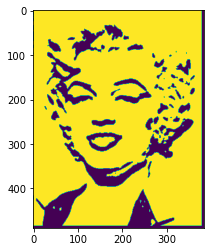

In [112]:
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

if False:
    kernel = 2*np.ones((20,20)) 
    kernel[:,5:10] = -20
    kernel /= kernel.sum()

dd = 5
if True:
    kernel = -20*np.ones((5*dd,1*dd)) 
    kernel[2*dd:4*dd] = 40
    kernel /= kernel.sum()

V = np.array([1,0,-1])
#kernel = np.vstack([V, -2*V, V])

image = processImage('marilyn.png')

output = convolve2D(image, kernel, padding=2)
output[ output >50 ] = 255
output[ output <50 ] = 0
cv2.imwrite('2DConvolved.png', output);
im = imageio.imread('./2DConvolved.png')
plt.imshow(im);

In [147]:
! ../.g


[master 9eaf255] web
 1 file changed, 28 insertions(+), 53 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 29.80 KiB | 709.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   443727e..9eaf255  master -> master


---  

# Rewrite 

- using signal.convolve
- skimage.io

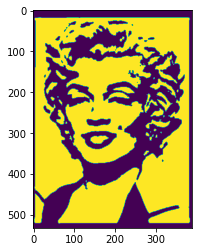

In [161]:
from skimage import io
img = io.imread( "./marilyn.png", as_gray=True)


kernel = -20*np.ones((5*dd,1*dd)) 
kernel[2*dd:4*dd] = 40
kernel /= kernel.sum()

#V = np.array([1,0,-1])
#kernel = np.vstack([V, -2*V, V])


img_conv = scipy.signal.convolve2d( img, 
                                 kernel, 
                                 boundary='fill')

output = np.copy(img_conv)
#the values are float
mask = output > .7
output[ mask] = 1.
output[~mask] = 0

plt.imshow(output);

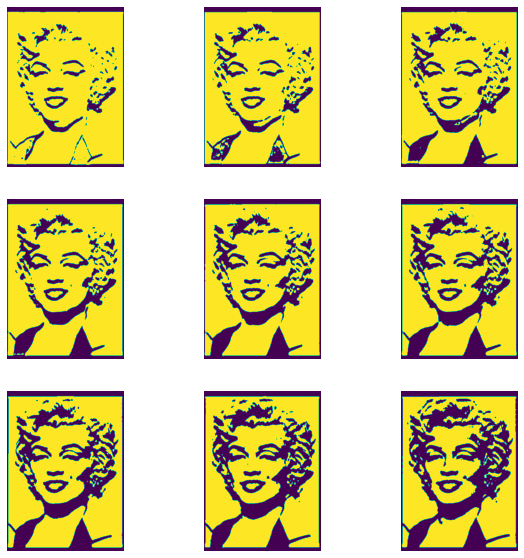

In [167]:
num_rows, num_cols = 3,3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(10,10)

axs = axs.ravel()
for ax in axs:
    ax.set_axis_off() 
 
for k, ax in zip(np.linspace(.05,.75, 9), axs):
    output = np.copy(img_conv)
    #the values are float
    mask = output > k
    output[ mask] = 1.
    output[~mask] = 0
    ax.imshow(output);


    

array([[0.08236784, 0.40628602, 0.73177283, ..., 0.08236784, 0.08236784,
        0.40628602],
       [0.08236784, 0.40714863, 0.7336549 , ..., 0.08236784, 0.08236784,
        0.40714863],
       [0.08236784, 0.40691319, 0.73208599, ..., 0.08236784, 0.08236784,
        0.40691319],
       ...,
       [0.08236784, 0.27837744, 0.47062234, ..., 0.08236784, 0.08236784,
        0.27837744],
       [0.08236784, 0.36651106, 0.64626212, ..., 0.08236784, 0.08236784,
        0.36651106],
       [0.08236784, 0.34115556, 0.59492367, ..., 0.08236784, 0.08236784,
        0.34115556]])

---

## But of course

You would never, ever write a function like this as  ``` cv2```
has functions for
[edge detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

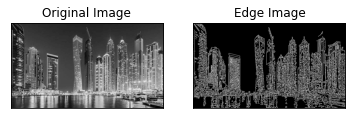

In [250]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./test_image.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Exo 

1.Try and compare the difference between the images

- subtract the arrays remember they are vectors
- calculate the $\|.\|_1$ distance
- calculate the $\|.\|_2$ distance
    
2. Change the kernel
  - so that it smooths/blurs the image.
  - use the Sobel kernel $\begin{pmatrix}
1 & 0 & −1 \\
2 & 0 & −2 \\
1 & 0 & −1
\end{pmatrix}$


3. Change the value of ```size``` below what happens ?
Fix it so it works.

4. What happens if we smooth a fractal like the Koch curve ?

---


5. Can you find a way of getting the original image back from the convolution ? 


Think about this then look at [this notebook](./conv_kernels.ipynb)



---


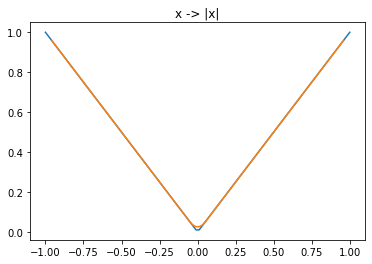

In [336]:
X = np.linspace(-1,1,100)
Y = np.abs(X)

size = 5

plt.plot(X,Y);
plt.plot(X[2:-2], 1/size * np.convolve(Y, np.ones(size))[4:-4])
plt.title('x -> |x|');

# Convolution applied to a curve

There is a problem. Can u see why this doesn't work ?

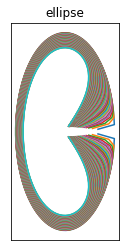

In [361]:
fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

K = np.ones(3)/3

T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(100):
    X =  np.convolve(X, K, mode='same')
    Y =  np.convolve(Y, K, mode='same')
    ax.plot(X,Y)
plt.title('ellipse');

# this works

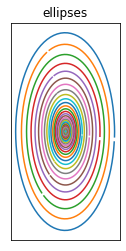

In [371]:
def circular_convolve(X, window=4):
    return sum([np.roll(X,k) for k in range(window)])/window
    

fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(2000):
    X = circular_convolve(X)
    Y = circular_convolve(Y)
    if k % 40 == 0:
        ax.plot(X,Y)
plt.title('ellipses');

what is happening ?

In [373]:
(max(Y) - min(Y))/(max(X) - min(X))


1.978965146699576

---

# Game of life

I am going to program this using a convolution and boolean masks.

### References

[a blog](https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/#:~:text=The%20Game%20of%20Life%20is,its%20neighbors%20must%20be%20alive.)

---

The state of the game is represented by a 2D array ```G``` of integers 
$\in \{ 1,0 \}$.
- 0 is dead.
- 1 is alive.

There are four rules in the [game of life](https://fr.wikipedia.org/wiki/Jeu_de_la_vie#R%C3%A8gles).
We apply a convolution to G to obtain H 
which calculates the number of neighbors.


Now we modify the values in H so that they are either 0 or 1 :

- H[H<=2] = 0
- H[(H==4)&(G==0) ] = 0
- H[H>4] = 0
- H[H>0] = 1

---

### Test Code

I have coded a [planeur](https://fr.wikipedia.org/wiki/Planeur_(jeu_de_la_vie))
to test the code.

---

## Animation

I'm going to make an animation. 

- The helper functions  to do this  are in the next cell. 
- You should install [ffmpeg](https://ffmpeg.org/download.html).


In [69]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML

##Animation code

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

## Set up 

- random starting configuration G
- the kernel K

In [87]:
K = np.ones((3,3))
K[1,1] = 0
K

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

---

# Exo

My code works but my  kernel  K 

``` 
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])
```

doesn't calculate the number of neighbors.

There should be a 0 in the middle like this


``` 
array([[1., 1., 1.],
       [1., 0, 1.],
       [1., 1., 1.]])
```

---

1. Modify the code to use this kernel
1. According to the wikipedia :

L'état suivant d'une cellule est : (S = 3) OU (E = 1 ET S = 2).

Avec :

S : nombre actuel de cellules vivantes dans son voisinage (entier naturel compris entre 0 et 8 inclus) ;
E : état actuel de la cellule (entier naturel égal à 0 pour une cellule morte et égal à 1 pour une cellule vivante).

Rewrite the code to use this rule and so that there are just 3 lines in th ```for``` loop.


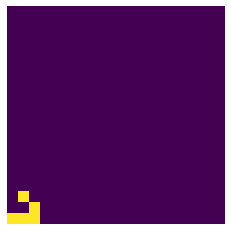

In [119]:
import  scipy 

E = np.zeros((20,20), dtype=np.int0)
#G[3,4:7] = 1
#G[3:5,3:5] = 1

#G[3,4:7] = 1
#G[4,5:8] = 1

#this is a planeur/glider to test

E[4,5:8] = 1
E[3,7] = 1
E[2,6] = 1

#E = np.random.randint(0, high=2, size=(20,20))

frames = []
for k in range(300):
    S = scipy.signal.convolve2d( E, K, boundary='wrap')[1:-1,1:-1]
    KK = np.zeros_like(S)
    KK[(S == 3) | (E == 1 ) & (S == 2)] = 1
    E = KK
    frames.append(np.copy(E))
    
HTML(plot_images(frames).to_html5_video())

In [113]:
! ../.g

[master 573dc2e] web
 2 files changed, 652 insertions(+), 3648 deletions(-)
 rewrite PROG/2DConvolved.png (99%)
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 64.36 KiB | 2.92 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   19e30d2..573dc2e  master -> master
